<a href="https://colab.research.google.com/github/swarupe7/oibsip_taskNo.1/blob/main/Iris_dataset18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IRIS-DATASET PREDICTION

Importing required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Importing dataset

In [ ]:
data=pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


removing unwanted columns

In [ ]:
r1=data.drop(columns=['Id','Species'])
r1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


target column

In [ ]:
r2=data['Species']
r2.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

Info and Structure of dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


data Preprocessing

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis

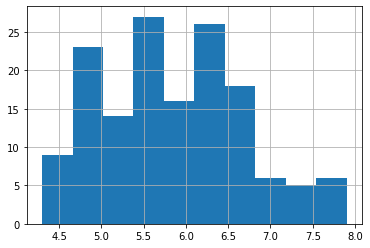

In [ ]:
r1['SepalLengthCm'].hist()

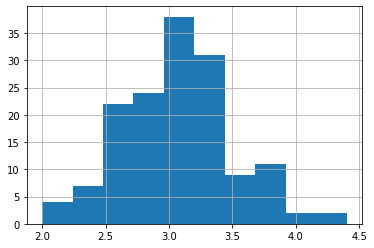

In [ ]:
r1['SepalWidthCm'].hist()

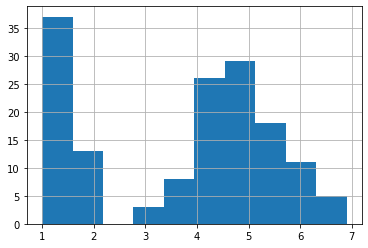

In [ ]:
r1['PetalLengthCm'].hist()

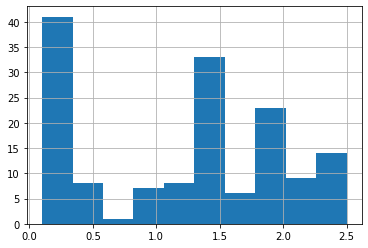

In [ ]:
r1['PetalWidthCm'].hist()

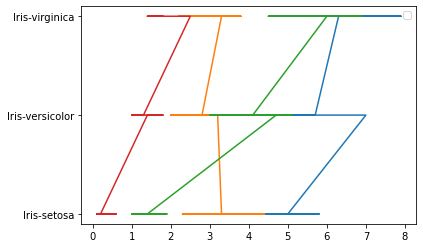

In [ ]:
plt.plot(r1,r2)
plt.legend()

Scatter Plot

In [ ]:
#scatterplot
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']


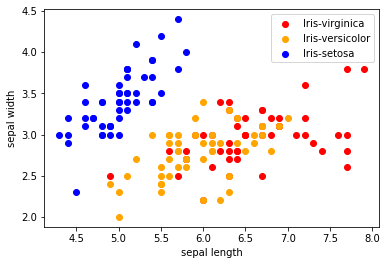

In [ ]:
for i in range(3):
  
  x=data[data['Species']==species[i]]
  
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

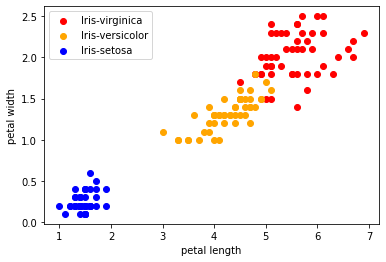

In [ ]:
#some what doubt on how it works!!

for i in range(3):
  
  x=data[data['Species']==species[i]]
  
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

Corelation matrix

In [ ]:
r1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


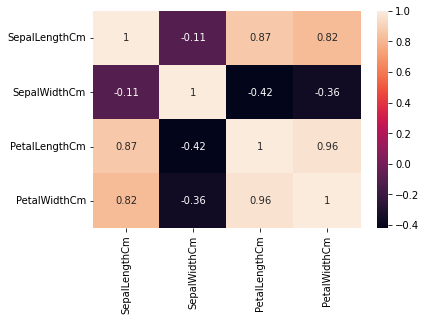

In [ ]:
corr=r1.corr()
#fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)#,ax=ax)

Label Encoder
changes label into some corresponding numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data['Species']=le.fit_transform(data['Species'])

r2=data['Species']
data.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Model Training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=r1
y=r2
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=130)

In [ ]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
model.fit(x_train,y_train)
#print('model score',model.score())


LogisticRegression()

In [ ]:
print(model.score(x_test,y_test)*100)

93.33333333333333


Testing using knn algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
print(model.score(x_test,y_test))

0.9333333333333333


Using decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(model.score(x_test,y_test))

0.9333333333333333
